In [1]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from src.solver import Solver
from src.model import AR


In [2]:
N = 1
T = 100
np.random.seed(1)
X = np.random.randn(N, T)
model =  AR(lag=2, phi=np.random.randn(2, 1), sigma=1, intercept=0.1)

In [3]:
solver = Solver(model, X,
                          update_rule='sgd',
                          optim_config={
                            'learning_rate': 1e-1,
                          },
                          
                          num_epochs=100, batch_size=1,
                          print_every=10)
solver.train()

100
the loss is %f [-363.12196006]
the loss is %f [-372.37485947]
the loss is %f [-383.34921252]
the loss is %f [-400.41061526]
the loss is %f [-454.18983075]
the loss is %f [-629.81720383]
the loss is %f [-629.84201016]
the loss is %f [-629.86680394]
the loss is %f [-629.89158519]
the loss is %f [-629.91635392]


In [4]:
print model.params

{'phi': array([[-29.40999941],
       [ 81.75741603]]), 'intercept': array([ 22.0688874]), 'sigma': array([-613.2648416])}


In [5]:
solver_sgd_momentum = Solver(model, X,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-4,
                          },
                          
                          num_epochs=100, batch_size=1,
                          print_every=10)
solver_sgd_momentum.train()

100
the loss is %f [-629.91891644]
the loss is %f [-629.91910781]
the loss is %f [-629.91933582]
the loss is %f [-629.91957659]
the loss is %f [-629.91982181]
the loss is %f [-629.92006858]
the loss is %f [-629.92031589]
the loss is %f [-629.92056339]
the loss is %f [-629.92081096]
the loss is %f [-629.92105854]


In [6]:
data = np.loadtxt("../data/SP500array.csv", delimiter=',')

In [7]:
X = data[:,1].reshape(1,-1)
solver = Solver(model, X,
                          update_rule='sgd',
                          optim_config={
                            'learning_rate': 1e-1,
                          },
                          
                          num_epochs=100, batch_size=1,
                          print_every=10)
solver.train()

100
the loss is %f [-6326984.76546658]
the loss is %f [-8280050.98563358]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]
the loss is %f [-10462.6987871]


In [8]:
print model.params

{'phi': array([[ 3827956.74501283],
       [ 3828266.63546154]]), 'intercept': array([ 64217.21589261]), 'sigma': array([  1.99509888e+09])}


In [9]:
print model.predict(X, 10)

[60.381741452295664, 60.083159231520668, 62.5118951481602, 63.165169000325612, 61.437800716379009, 61.4187635949202, 59.649313253012032, 59.940881797460086, 59.179396939107761, 60.731423314881127]


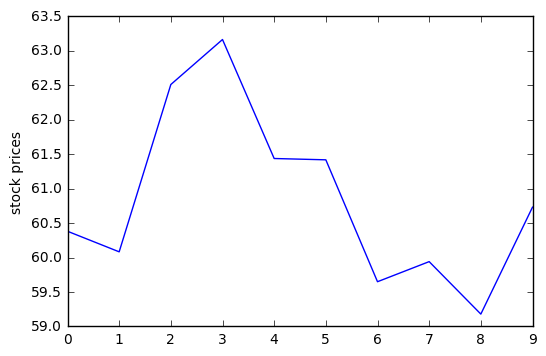

In [10]:
from src.model import plot_price
pred_price = model.predict(X[0:X.shape[1]-10], 10)
plot_price (pred_price)

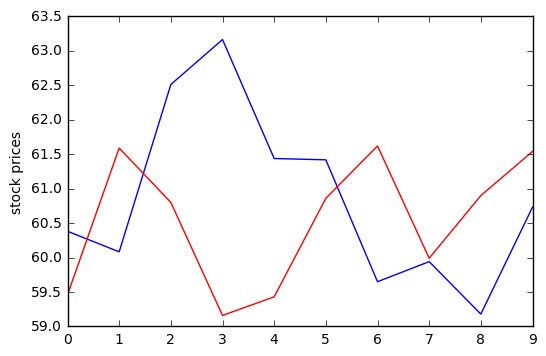

In [11]:
from src.model import plot_price_pred_vs_true
pred_price = model.predict(X[0:X.shape[1]-10], 10)
plot_price_pred_vs_true(pred_price, X[0,X.shape[1]-10:X.shape[1]])